Vista previa del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Estadísticas descriptivas:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75

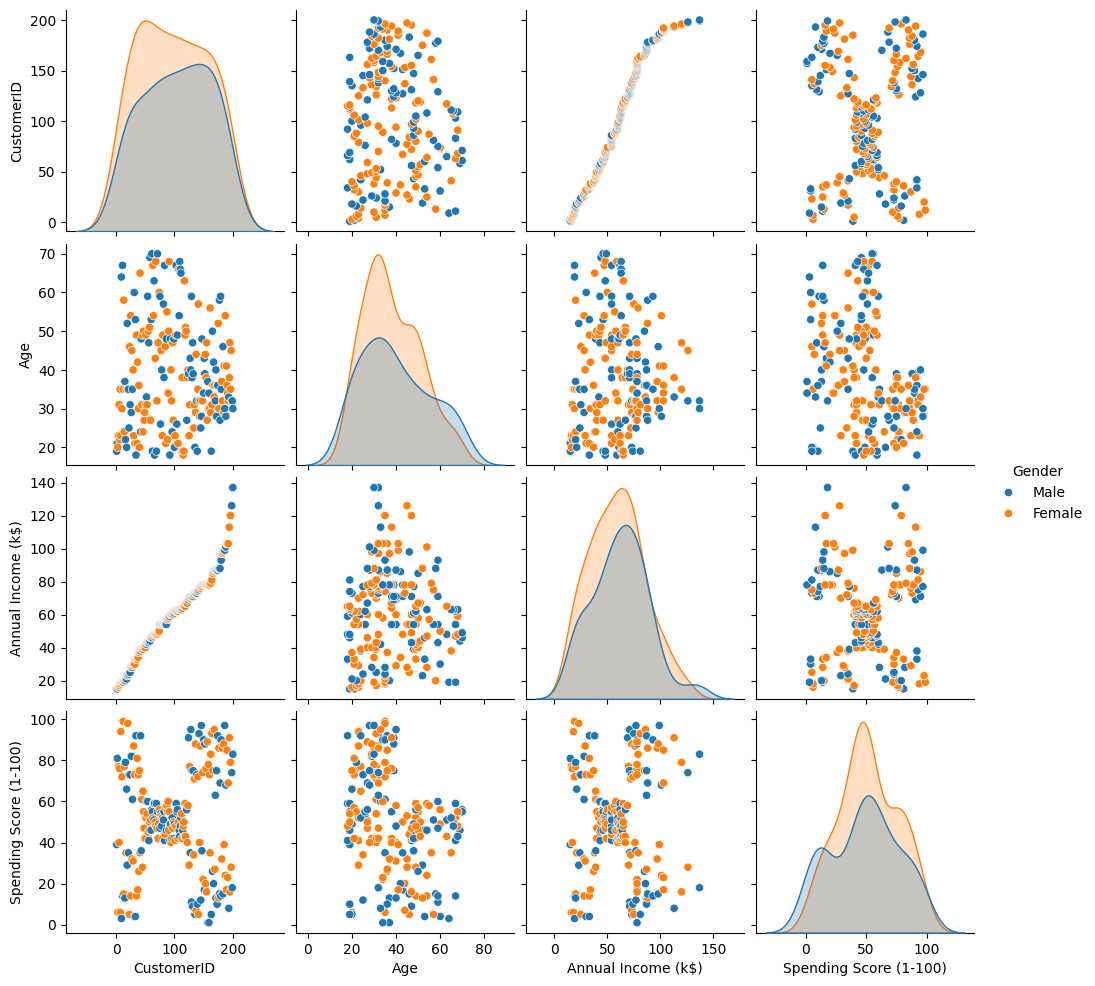

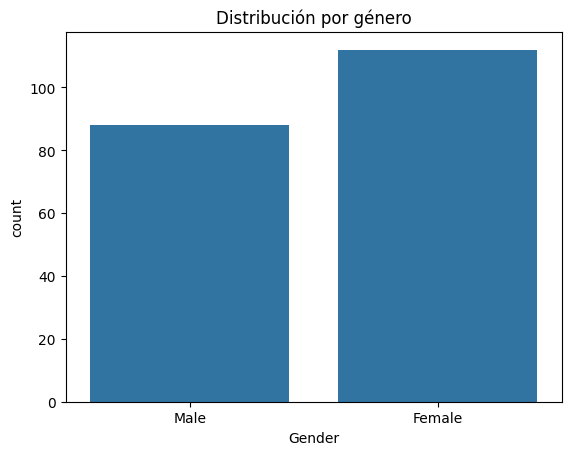

In [16]:
# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos desde un archivo CSV
file_path = "./Mall_Customers.csv"  # Cambia a la ruta de tu archivo CSV
data = pd.read_csv(file_path)

# Vista previa de los datos
print("Vista previa del dataset:")
print(data.head())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())

# Gráficos exploratorios
sns.pairplot(data, hue="Gender", diag_kind="kde")
plt.show()

# Distribución por género
sns.countplot(data=data, x="Gender")
plt.title("Distribución por género")
plt.show()


In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Manejo de valores faltantes (si existen)
data = data.dropna()  # Puedes usar otras estrategias según sea necesario

# Codificación de la columna 'Gender'
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  # Male = 1, Female = 0

# Selección de características numéricas
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Escalado de los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print("\nDatos escalados:")
print(scaled_features)



Datos escalados:
[[ 1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [ 1.12815215 -1.28103541 -1.73899919  1.19570407]
 [-0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [-0.88640526 -1.13750203 -1.70082976  1.04041783]
 [-0.88640526 -0.56336851 -1.66266033 -0.39597992]
 [-0.88640526 -1.20926872 -1.66266033  1.00159627]
 [-0.88640526 -0.27630176 -1.62449091 -1.71591298]
 [-0.88640526 -1.13750203 -1.62449091  1.70038436]
 [ 1.12815215  1.80493225 -1.58632148 -1.83237767]
 [-0.88640526 -0.6351352  -1.58632148  0.84631002]
 [ 1.12815215  2.02023231 -1.58632148 -1.4053405 ]
 [-0.88640526 -0.27630176 -1.58632148  1.89449216]
 [-0.88640526  1.37433211 -1.54815205 -1.36651894]
 [-0.88640526 -1.06573534 -1.54815205  1.04041783]
 [ 1.12815215 -0.13276838 -1.54815205 -1.44416206]
 [ 1.12815215 -1.20926872 -1.54815205  1.11806095]
 [-0.88640526 -0.27630176 -1.50998262 -0.59008772]
 [ 1.12815215 -1.3528021  -1.50998262  0.61338066]
 [ 1.12815215  0.94373197 -1.43364376 -0.82301709]
 [-0.88640526

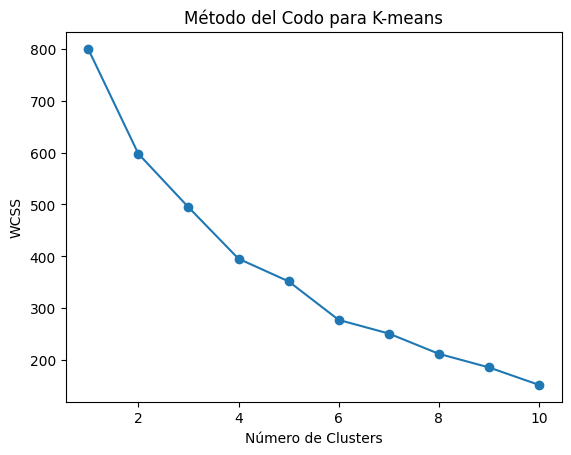

In [26]:
from sklearn.cluster import KMeans

# Método del codo
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Gráfico del codo
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo para K-means')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Entrenamiento del modelo con k=3
kmeans = KMeans(n_clusters=5, random_state=20)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)


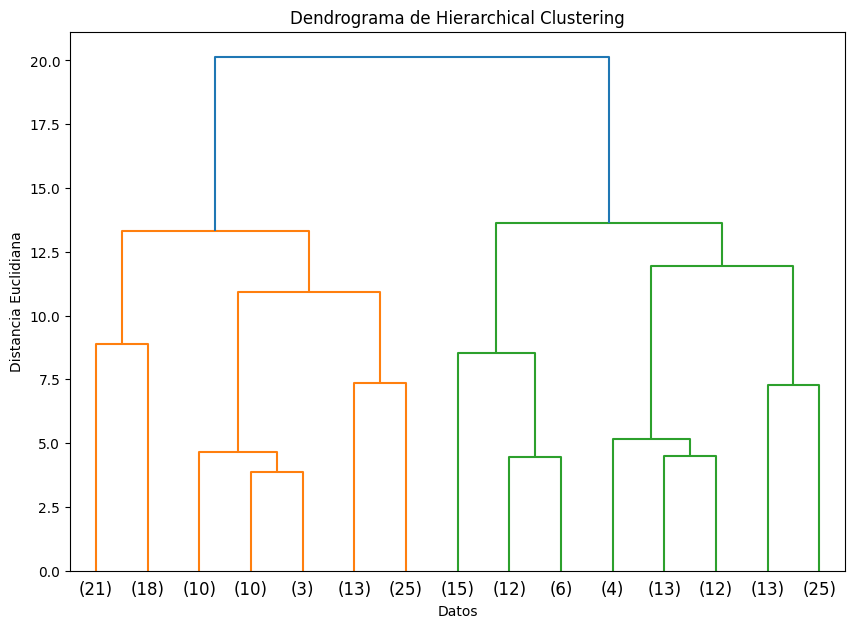

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Generar el dendrograma
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=15)
plt.title('Dendrograma de Hierarchical Clustering')
plt.xlabel('Datos')
plt.ylabel('Distancia Euclidiana')
plt.show()

# Asignación de clusters (k=3)
data['Hierarchical_Cluster'] = fcluster(linked, 5, criterion='maxclust')


In [31]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Evaluación de K-means
silhouette_kmeans = silhouette_score(scaled_features, data['KMeans_Cluster'])
calinski_kmeans = calinski_harabasz_score(scaled_features, data['KMeans_Cluster'])

print(f"Silhouette K-means: {silhouette_kmeans:.3f}")
print(f"Calinski-Harabasz K-means: {calinski_kmeans:.3f}")

# Evaluación de Hierarchical Clustering
silhouette_hierarchical = silhouette_score(scaled_features, data['Hierarchical_Cluster'])
calinski_hierarchical = calinski_harabasz_score(scaled_features, data['Hierarchical_Cluster'])

print(f"Silhouette Hierarchical: {silhouette_hierarchical:.3f}")
print(f"Calinski-Harabasz Hierarchical: {calinski_hierarchical:.3f}")


Silhouette K-means: 0.317
Calinski-Harabasz K-means: 70.366
Silhouette Hierarchical: 0.287
Calinski-Harabasz Hierarchical: 64.469


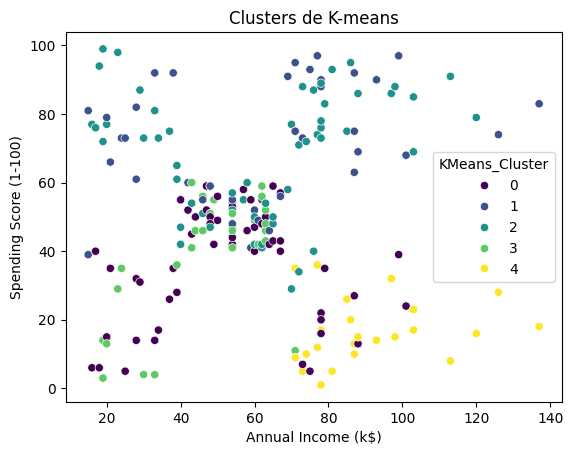

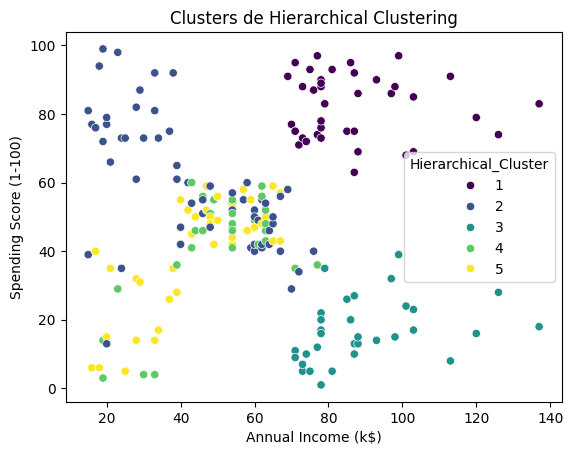

In [32]:
# Visualización de K-means
sns.scatterplot(x=data['Annual Income (k$)'], 
                y=data['Spending Score (1-100)'], 
                hue=data['KMeans_Cluster'], palette='viridis')
plt.title('Clusters de K-means')
plt.show()

# Visualización de Hierarchical Clustering
sns.scatterplot(x=data['Annual Income (k$)'], 
                y=data['Spending Score (1-100)'], 
                hue=data['Hierarchical_Cluster'], palette='viridis')
plt.title('Clusters de Hierarchical Clustering')
plt.show()


In [33]:
data.to_csv('resultados.csv', index=False)